<a href="https://colab.research.google.com/github/reiple/ds2_data_mining_hw/blob/ckhsmile/DataMining_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터과학 HW

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm, binom, chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split
from collections import Counter

### 3.임의 표본 추정

각각의 분포에서 표본을 1000개 생성하고, 이 데이터를 이용하여 왜도(skewness), 첨도(kurtosis)를 추정하시오.

표본 평균 $\bar{x} = {1\over{n}}\sum_{i=1}^n x_i$

표본 분산 $s^2 = {1\over{n-1}}\sum_{i=1}^n (x_i - \bar{x})^2$

표본 왜도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^3$

표본 첨도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^4$

---


(a) 왜도(Skewness): 분포가 한쪽으로 치우친 정도를 측정하는 통계량

i. **N(0,2)** 과 𝒳(**5**) 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 왜도를 구하시오.

N(0,2)의 왜도: -0.21034703073988445
chi(5)의 왜도: 1.7601568750609358


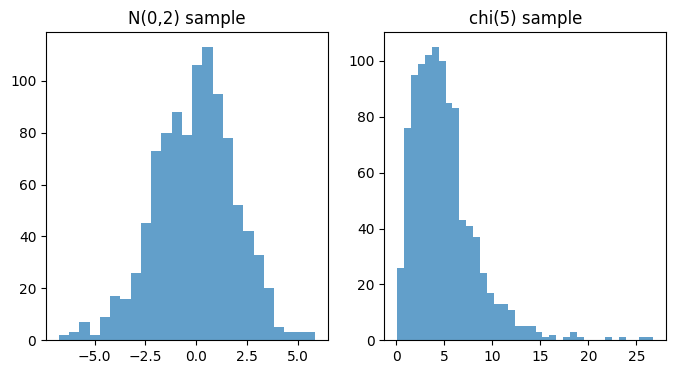

In [68]:
from scipy.stats import skew


normal_sample = norm.rvs(loc = 0, scale= 2, size=1000) #rvs : 랜덤 표본 생성하는 매서드, loc : 평균, scale : 표준편차
chi_sample = chi2.rvs(5, size=1000)  # 자유도

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(x=normal_sample, bins='auto', alpha=0.7) # alpha : 투명도로 0에 가까울수록 요소가 투명해지고 1에 가까울수록 불투명해짐.
ax1.set_title('N(0,2) sample')
# ax1.set_ylim([0,120])

ax2.hist(x=chi_sample, bins='auto', alpha=0.7)
ax2.set_title('chi(5) sample')
# ax2.set_ylim([0,120])
fig.show()

print(f'N(0,2)의 왜도: {skew(normal_sample)}')
print(f'chi(5)의 왜도: {skew(chi_sample)}')

(b) 첨도(Kurtosis): 이상치가 얼마나 존재하는지를 측정하는 통계량

i. 자유도가 1인 t분포, 자유도가 10인 t분포와 표준정규분포(N(0,1))에서 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 첨도를 구하시오.

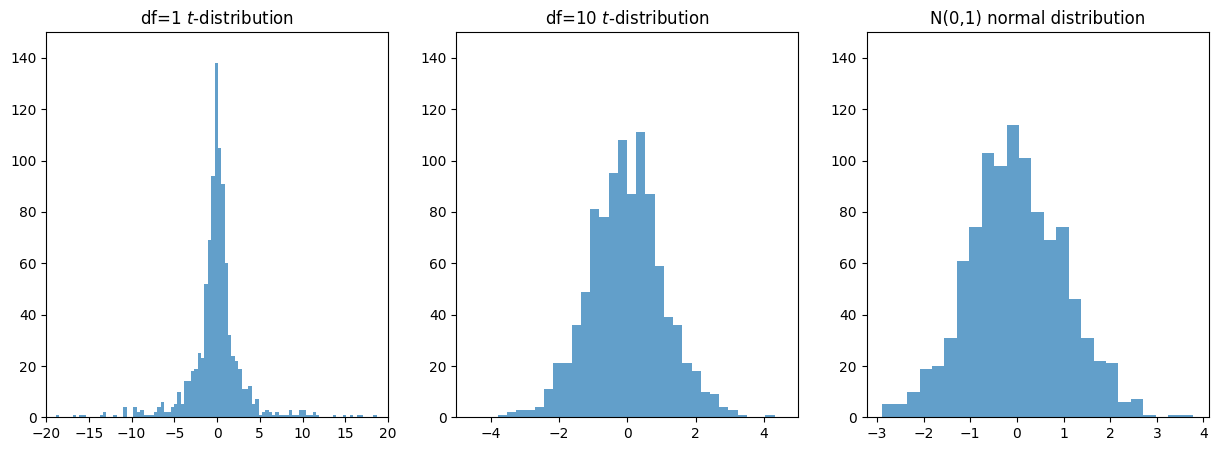

In [69]:
from scipy.stats import kurtosis

t_sample_1 = t.rvs(df=1, size=1000)
t_sample_10 = t.rvs(df=10, size=1000)
snormal_sample = norm.rvs(loc=0, scale=1, size=1000) # 정규분포

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 150)
ax1.hist(t_sample_1, bins='auto', alpha=0.7)
ax1.set_title(r'df=1 $t$-distribution')

ax2.set_xlim(-5, 5)
ax2.set_ylim(0, 150)
ax2.hist(t_sample_10, bins='auto', alpha=0.7)
ax2.set_title(r'df=10 $t$-distribution')

ax3.set_ylim(0, 150)
ax3.hist(snormal_sample, bins='auto', alpha=0.7)
ax3.set_title(r'N(0,1) normal distribution')

fig.show()

In [70]:
print(r'df=1 t-distribution kurtosis:', kurtosis(t_sample_1))
print(r'df=10 t-distribution kurtosis:', kurtosis(t_sample_10))
print(r'N(0,1) normal distribution kurtosis:', kurtosis(snormal_sample))

# 첨도 ; 확률 분포의 꼬리 부분의 뾰족함 또는 평평함을 나타내는 통계적인 개념.
# 정규 분포보다 t 분포가, t 분포의 자유도가 낮을수록 첨도가 큼 (꼬리가 길음)
# t 분포는 모집단의 표준편차를 모를때 표본의 표준편차를 사용, 자유도(샘플링수 -1)가 클수록 정규 분포에 가까워짐

df=1 t-distribution kurtosis: 127.5159217397447
df=10 t-distribution kurtosis: 1.7309431713091126
N(0,1) normal distribution kurtosis: 0.07558752922321998


### 4.랜덤워크

$X_i \overset{i.i.d}{\sim} U(-1, 1)$ 일 때, $S_n = X_1 + \cdots + X_n$ 인 랜덤워크에 대해서 고려하자.

독립적으로 생성된 두 개의 랜덤워크 $\{S_n : n = 1, \cdots , 10000\}$ 과 $\{S_n' : n = 1, \cdots , 10000\}$ 의 상관계수를 구하시오.

In [71]:
uniform_sample1 = uniform.rvs(loc = -1, scale = 2, size = 10000) # loc : uniform  분포의 최소값, scale : 범위로 -1+2 = 1 -> U(-1,1)이 됨.
uniform_sample2 = uniform.rvs(loc = -1, scale = 2, size = 10000)
# np.corrcoef(uniform_sample1, uniform_sample2)를 사용하면 상관 관계가 아닌 두 변수 간의 상관계수를 계산하게 됨.

random_walk1 = np.array([])
random_walk2 = np.array([])

for i in range(10000):
  random_walk1 = np.append(random_walk1, uniform_sample1[0:i+1].sum())
  random_walk2 = np.append(random_walk2, uniform_sample2[0:i+1].sum())
  # 랜덤 워크 변수의 누적 합을 계산함으로써 시간에 따른 경로를 모델링하고, 이를 통해 상관관계를 계산할 수 있음.

np.corrcoef(random_walk1, random_walk2)
# 상관계수가 0.8938로 독립적인 두개의 랜덤 워크도 상관관계가 높음.

array([[ 1.   , -0.333],
       [-0.333,  1.   ]])

### 5.모비율 검정

로또는 45개의 숫자 중에서 6개의 당첨 번호를 추첨한다. 10번의 모의실험을 통해 당첨번호를 추출 한 후, 각 번호가 나올 확률이 동일한지를 검정하려고 한다. 다음의 절차를 따르시오.

(이 때 i번째 공이 당첨번호에 포함될 확률을 $p_i$라고 하자.)

---


(a) 각 번호가 나올 확률이 동일하다고 가정하고 로또 당첨 번호를 10회 추출하시오.

In [72]:
winning_tickets= [np.random.choice(range(1, 46), size=6, replace=False) for i in range(10)]
winning_tickets

[array([11, 38, 13, 36, 17, 20]),
 array([ 2, 43, 26, 11,  4, 28]),
 array([43,  3, 31, 45, 36, 34]),
 array([ 7, 45, 13, 32, 29, 38]),
 array([45, 18, 23,  4,  6,  2]),
 array([35, 24,  4,  3, 12, 39]),
 array([ 8, 19,  9, 21, 31, 13]),
 array([28, 25, 31, 12, 16, 19]),
 array([31, 42, 44,  2, 15, 11]),
 array([28, 22, 14, 30,  6, 19])]

(b) 10개의 표본을 통해 각 i번째 공이 당첨 번호에 포함 될 확률 $\hat{p}_i$ 를 추정하시오.

In [73]:
winning_tickets = np.array(winning_tickets).reshape(-1)
count_numbers = np.bincount(winning_tickets)[1:] # np.bincount() : 0부터 시작하는 정수 배열에 대해 각 숫자의 발생 빈도를 계산

# 나오지 않는 숫자가 있을수 있으므로 크기가 45가 되도록 0으로 패딩
if len(count_numbers) < 45:
    count_numbers = np.pad(count_numbers, (0, 45 - len(count_numbers)), mode='constant')

# print(count_numbers)

# 각 i번째 공의 당첨 확률을 계산하여 출력
prob_arr=np.array([])

for i in range(len(count_numbers)):
    prob_arr = np.append(prob_arr, count_numbers[i] / len(winning_tickets))

print(prob_arr)

# for i, prob in enumerate(prob_arr, start=1):
#     print(f"{i}번 공 확률: {prob:.8f}")

# enumerate(iterable, start=1) : 반복 가능한(iterable) 객체(리스트, 튜플, 문자열 등)를 받아 인덱스와 해당 요소를 함께 반환하는 iterator를 생성
#                              : start는 인덱스의 시작값을 의미하며 기본값은 0, 1로 할 경우 실제 데이터는 0부터 있지만 1부터 시작하는것처럼 할수 있음.


[0.    0.05  0.033 0.05  0.    0.033 0.017 0.017 0.017 0.    0.05  0.033
 0.05  0.017 0.017 0.017 0.017 0.017 0.05  0.017 0.017 0.017 0.017 0.017
 0.017 0.017 0.    0.05  0.017 0.017 0.067 0.017 0.    0.017 0.017 0.033
 0.    0.033 0.017 0.    0.    0.017 0.033 0.017 0.05 ]


(c) 각 i에 대해 다음의 검정을 시행하시오. p-value가 0.05보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45$ vs $H_1 : p_i > 6/45$

In [74]:
from statsmodels.stats.proportion import proportions_ztest

pval_arr = np.array([])

for i in range(len(count_numbers)):
    z_stats, p_val = proportions_ztest(count_numbers[i], nobs=10, value=6/45, alternative= "larger")
    # print(f"{i+1}번째 공 z-stats : {z_stats:.4f}, p-value : {p_val:.4f} ")
    pval_arr = np.append(pval_arr, p_val)

print('p-value가 0.05보다 작은 경우는 ', (pval_arr < 0.05).sum(), '개 입니다.')


p-value가 0.05보다 작은 경우는  1 개 입니다.


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std


(d) 본페르니 교정을 이용하여, 다중 검정을 시행하시오. p-value가 0.05/45보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45, ∀i$ vs $H_1$ : 어떤 i에 대해서 $p_i > 6/45$ 을 만족한다.

In [75]:
print('p-value가 0.05/45 보다 작은 경우는 ', (pval_arr < 0.05/45).sum(), '개 입니다.')


p-value가 0.05/45 보다 작은 경우는  0 개 입니다.


[참고]   
본페르니 교정(Bonferroni correction)은 다중 비교를 할 때 제1종 오류의 확률을 제어하기 위한 방법 중 하나
* 제1종 오류 : 실제로는 차이나 효과가 없는데 데이터의 샘플링 변동 등의 이유로인해 차이나 효과가 있다고 잘못 결론 내리는 오류
* 다중 비교 문제는 여러 개의 독립적인 가설 검정을 동시에 수행할 때 각각의 검정에서 제1종 오류의 위험이 누적되므로  
  이를 제어하지 않으면 전체적인 제1종 오류의 확률이 크게 증가함.  
* 본페르니 교정은 이러한 문제를 해결하기 위한 방법 중 하나로, 원래의 유의수준을 전체 검정 횟수로 나눈 값을 새로운 유의수준으로 사용하는 방법임.

본페르니 교정은 매우 보수적인 방법으로, 이 방법을 사용할 경우
제1종 오류의 위험은 크게 줄어들지만, 제2종 오류의 위험(실제로 차이나 효과가 있지만 그렇지 않다고 결론 내리는 오류)은 증가할 수 있음


### 6.p-value 계산
스웨인 대 알리바마 재판에서 귀무 가설은 '공정한 배심원 선택' 이고 대립가설은 '불공정한 배심원 선택'이다.  
전체 인구 중 26%가 흑인이다. 우리는 100명을 뽑았을 때, 8명의 흑인이 선택되었다는 데이터를 관찰하였다.  
이 경우 p-value를 구하여라.

(hint: 이항분포의 누적분포함수 또는 확률질량함수를 이용하시오.)

$H_0 : \mu = \mu_0$ vs $H_1 : \mu > \mu_0$

검정통계량 $Z = \dfrac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}\sim N(0,1)\; (H_0 \text{가 참일 때})$


z : 실제 관측된 검정통계량 값

P-value = $P(Z > z | H_0)$

p-value : 귀무가설 $H_0$ 하에서 관찰된 검정통계량 값이 귀무가설 $H_0$에 더 반대되는 결과를 관측할 확률을 유의확률이라고 하며, 이는 관측 결과에 의해 귀무가설 $H_0$를 기각할 수 있는 최소의 유의수준이다.

In [76]:
# 이항 분포의 누적 분포 함수 활용

print('p-value:', binom.cdf(n = 100, p=0.26, k=8))
# 100번의 시행에서 성공 확률이 26%인 이항 분포에서 8번 이하의 성공이 나올 확률
# k: 성공의 횟수, n: 시행 횟수, p: 성공 확률


# 이항 분포의 확률 질량 함수를 활용
p_val = 0
for i in range(9): # 0에서 8번까지이므로.. range(9)로 해야 함.
  p_val += binom.pmf(n=100, p=0.26, k=i)

print(f'p-value: {p_val}')

p-value: 4.73479499788932e-06
p-value: 4.734794997889316e-06


### 8.Bootstrap sampling
 다음의 데이터를 주어졌다고 하자.   
 이때, 설명변수를 $(x_1, x_2)$, 반응변수를 $y$로 하는 선형회귀모형을 가정하고 $(x_1, x_2) = (0.1, 0.2)$일 때,  
 Bootstrap resampling을 통한 예측구간 (prediction interval)을 추정하고자 한다.  
다음의 식을 만족하는 $[L, U]$을 $x_{\text{new}}$ 일 때, 신뢰도가 $(1 - \alpha)\%$인 예측 구간이라고 한다.  
$P(L\leq x_{new}^{T}\hat{\beta }+\varepsilon \leq U) = 1-\alpha $

\#  1   2 3 4 5 6 7 8 9 10  
$y$   5. 7.9 11.2 11.7 8.9 6.8 8.4 8.8 10.1 7.5  
$x_1$ 1. 1.1 1.5 3. 2.4 1.2 2.4 2.9 1.3 2.  
$x_2$ 0.5 2.1 3. 1.5 1.7 1.2 0.2 0.9 2.3 1.  


**(a)**
Bootstrap resampling을 이용하여 bootstrap sample을 얻고 이를 이용하여 선형회귀모형의 계수를 추정하시오.

In [77]:
import pandas as pd
import numpy as np

# 데이터 생성
data = {
    'y': [5.0, 7.9, 11.2, 11.7, 8.9, 6.8, 8.4, 8.8, 10.1, 7.5],
    'x1': [1.0, 1.1, 1.5, 3.0, 2.4, 1.2, 2.4, 2.9, 1.3, 2.0],
    'x2': [0.5, 2.1, 3.0, 1.5, 1.7, 1.2, 0.2, 0.9, 2.3, 1.0]
}

df = pd.DataFrame(data)

df.head()

,y,x1,x2
0,5.0,1.0,0.5
1,7.9,1.1,2.1
2,11.2,1.5,3.0
3,11.7,3.0,1.5
4,8.9,2.4,1.7


In [78]:
import statsmodels.api as sm

rand_idx =np.random.choice(len(df), 100, replace= True)  #  0부터 'len(df) -1'까지의 숫자 중 무작위로 100개의 숫자를 선택, 중복 허용
# print(rand_idx)

bootstrap_sample = df.iloc[rand_idx] # iloc : index를 사용하여 특정 행들을 선택

# print('bootstrap sample수 :', len(bootstrap_sample))
# bootstrap_sample.head(10)

x = sm.add_constant(bootstrap_sample[['x1', 'x2']])
y = bootstrap_sample['y']

olsfit = sm.OLS(y, x).fit()
olsfit.params



const    2.467860
x1       1.960304
x2       1.641050
dtype: float64

[참고]   

> x = sm.add_constant(bootstrap_sample(['x1', 'x2']))  

주어진 배열에 상수 열을 추가하여 다음과 같은 식으로 확장함.   
$y = \beta_0 \cdot 1 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \epsilon$

이렇게 상수항을 추가함으로써, 모델은 절편 $ \beta_0$을 추정할 수 있게 됨.  
만약 sm.add_constant() 함수를 사용하지 않고 모델을 적합하면, 절편이 제외된 모델이 된다.







**(b)**
(a)에서 추정한 모형을 이용하여 $(x1, x2) = (0.1, 0.2)$일 때의 예측값을 구하시오.

In [79]:
predict_value = olsfit.predict((1, 0.1,0.2))
print("예측값:", predict_value) # predict(const, x1, x2) 상수항을 넣어줘야함.

예측값: [2.992]


**(c)**
(a)에서 추정한 모형과 bootstrap sample들을 이용하여 잔차들을 구하고, 그 잔차들 중 하나의 값을 랜덤 추출 하시오.



In [80]:
random_residual = np.random.choice(olsfit.resid)
print('랜덤으로 추출된 잔차: ', random_residual)

랜덤으로 추출된 잔차:  0.8896520957930427


**(d)**
(b)에서 추정한 예측값과 (c) 생성된 노이즈를 더한 값을 저장하시오.



In [81]:
data = predict_value + random_residual
print(data)

[3.882]


**(e)**
(a)-(d) 과정을 2,000번 반복하시오.



In [82]:
predict_values = np.array([])

for i in range(2000):
  rand_idx =np.random.choice(len(df), 100, replace= True)
  bootstrap_sample = df.iloc[rand_idx] # iloc : index를 사용하여 특정 행들을 선택

  x = sm.add_constant(bootstrap_sample[['x1', 'x2']])
  y = bootstrap_sample['y']

  olsfit = sm.OLS(y, x).fit()
  predict_val = olsfit.predict((1, 0.1,0.2))
  random_res = np.random.choice(olsfit.resid)

  predict_values = np.append(predict_values, predict_val + random_res )


# print(len(predict_values))
predict_values


array([2.407, 3.274, 3.686, ..., 2.218, 1.685, 4.175])

**(f)**
(e) 에서 저장된 2000개의 값들을 이용하여 $(x1, x2) = (0.1, 0.2)$일 때의 95% 예측구간을 구하시오.

In [83]:
from scipy.stats import norm

z_value = norm.ppf(0.975)  # 95% 신뢰수준을 갖는 정규분포의 Z 값을 계산

mean_predict = np.mean(predict_values)
stdev = np.std(predict_values)

predict_interval = (mean_predict - z_value * stdev , mean_predict + z_value * stdev)

print("95% 예측 구간:", predict_interval)

95% 예측 구간: (1.3770188219964987, 4.387877839079566)


### 9.QQ-Plot
문제 8의 Table 1 데이터를 이용하자. 선형 모형의 잔차 ($\hat{\varepsilon }_{i} = y_i - \hat{y}_i$)들을 이용하여 QQ-plot을 그리고 해석하시오.


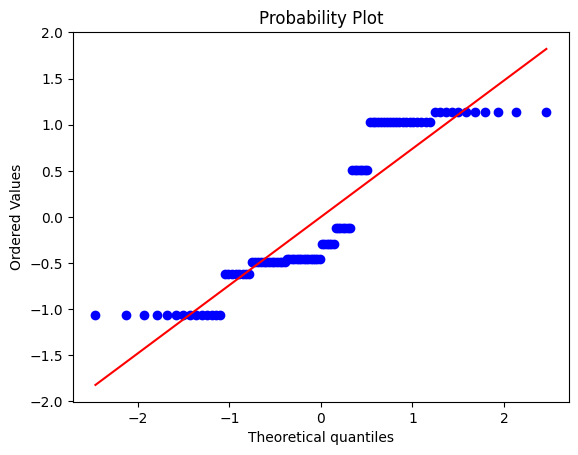

In [84]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(olsfit.resid, dist="norm", plot= plt)
plt.show()

[참고]   
QQ-plot(Quantile-Quantile Plot)은  
잔차나 데이터의 분포가 정규 분포와 얼마나 유사한지 시각적으로 판단하는 데 사용되는 그래프

만약 QQ-plot 상의 점들이 대각선에 가까이 분포하는 모습을 보인다면, 해당 데이터나 잔차가 정규분포에 근사적으로 따르는 것으로 볼 수 있음.

그러나, 위의 그래프를 봤을때 점들이 계단 모양으로 분포하고 있으므로
잔차는 정규분포를 따른다고 할수 없음.

In [85]:
from scipy.stats import kstest

# 잔차의 정규성을 검증하는 가장 일반적인 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) 수행
# H0 : 잔차가 정규 분포를 따른다
ks_statistic, p_value = kstest(olsfit.resid, 'norm')

if p_value > 0.05:
    print(f"p-value가 {p_value:.4f}로 유의수준 0.05보다 크므로 정규분포를 따른다는 귀무가설을 기각할 수 없습니다.")
else:
    print(f"p-value가 {p_value:.4f}로 유의수준 0.05보다 작으므로 정규분포를 따른다는 귀무가설을 기각합니다.")

p-value가 0.0032로 유의수준 0.05보다 작으므로 정규분포를 따른다는 귀무가설을 기각합니다.


### 10.차원의 저주
차원의 저주에 대한 모의 실험을 위해 아래의 절차를 따르시오.

(a) \( d=1 \) 일때, $X \sim  U(-3,3)$를 따르는 데이터를 50개 생성하시오.




In [86]:
x = np.random.uniform(-3, 3, size=50)
print(len(x))
x

50


array([-0.138, -0.018,  2.098,  1.566,  0.011,  2.998, -1.706,  1.668,
        0.335,  0.856, -0.403, -0.907, -1.865,  2.901,  2.403,  0.605,
        2.022, -2.52 ,  1.232,  1.474, -2.316, -0.677, -0.234, -2.891,
       -0.115, -2.278,  2.806,  2.564, -1.723,  2.026,  1.063,  1.021,
       -2.303, -0.422, -1.076,  2.638,  2.892, -0.348, -0.192, -1.152,
       -1.549, -1.532,  1.313,  0.112, -2.884, -1.902, -2.543, -1.966,
        1.833, -0.191])

(b) $( X_i > 0 )$ 이면 $( Y_i = 1 )$, 그렇지 않으면 $( Y_i = 0 )$인 데이터를 생성하시오.


In [87]:
y = (x > 0)*1
# print(len(y))
y

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0])


(c) 학습데이터와 테스트데이터의 비율이 0.5가 되도록 나누시오.


In [88]:
from sklearn.model_selection import train_test_split

data_arr = np.c_[x, y]
# np.c_ 함수는 NumPy에서 배열들을 연결하는 함수 중 하나
# 두 개의 배열을 열 방향으로(concatenate along columns) 연결하여 하나의 2차원 배열로 만듦
# c_는 "concatenate along columns"의 약어
df = pd.DataFrame(data_arr)

train_data, test_data = train_test_split(df, test_size = 0.5)

# print("train data size:", train_data.shape)
# print("test data size:",test_data.shape)


(d) 학습데이터로 K-NN(K=3) 모형을 학습하고, 테스트 데이터를 이용하여 정확도를 계산하시오.


In [89]:
from sklearn.neighbors import KNeighborsClassifier

# 1) K-NN (K=3) 모델 정의
knn = KNeighborsClassifier(n_neighbors=3)

# 2) train 데이터로 모델 학습(fit)
knn.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])
# [:, :-1]은 모든 행(:)과 마지막 열을 제외한 모든 열(:-1)을 선택함.

# 3) test 데이터로 정확도 검증
y_pred = knn.predict(test_data.iloc[:,:-1])

# 정확도 계산
accuracy = (y_pred == test_data.iloc[:,-1]).mean()

results = []
results.append((1, accuracy))

print("테스트 데이터 정확도:", accuracy)


테스트 데이터 정확도: 0.96



(e) (a) ∼ (d)의 과정을 $( d = 2, \ldots, 40 )$ 까지 반복하고, 정확도를 저장하시오.  
> (d ≥ 2 일 때는, 생성된 $( X_i \sim U(-3, 3)^d )$ 데이터들의 1번째 성분이 0보다 크면 1, 아니면 0으로 레이블링 하시오.)




In [90]:
knn = KNeighborsClassifier(n_neighbors=3)

for d in range(2,41):
  x = np.random.uniform(-3, 3, size=50*d)
  x = x.reshape(50, d)
  y = (x[:,0] > 0)*1

  data_arr = np.c_[x, y]
  df = pd.DataFrame(data_arr)

  train_data, test_data = train_test_split(df, test_size = 0.5)
  knn.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

  y_pred = knn.predict(test_data.iloc[:,:-1])
  accuracy = (y_pred == test_data.iloc[:,-1]).mean()

  results.append((d, accuracy))

# 결과를 NumPy 배열로 변환
results = np.array(results)
print(results)

[[ 1.    0.96]
 [ 2.    0.8 ]
 [ 3.    0.88]
 [ 4.    0.92]
 [ 5.    0.88]
 [ 6.    0.76]
 [ 7.    0.8 ]
 [ 8.    0.8 ]
 [ 9.    0.68]
 [10.    0.76]
 [11.    0.68]
 [12.    0.72]
 [13.    0.8 ]
 [14.    0.84]
 [15.    0.68]
 [16.    0.48]
 [17.    0.64]
 [18.    0.52]
 [19.    0.6 ]
 [20.    0.44]
 [21.    0.76]
 [22.    0.64]
 [23.    0.32]
 [24.    0.84]
 [25.    0.72]
 [26.    0.72]
 [27.    0.72]
 [28.    0.6 ]
 [29.    0.64]
 [30.    0.68]
 [31.    0.52]
 [32.    0.8 ]
 [33.    0.56]
 [34.    0.68]
 [35.    0.72]
 [36.    0.72]
 [37.    0.84]
 [38.    0.72]
 [39.    0.6 ]
 [40.    0.36]]


(f) X축을  d(차원의 수), Y축을 정확도로 하는 그래프를 그리시오.

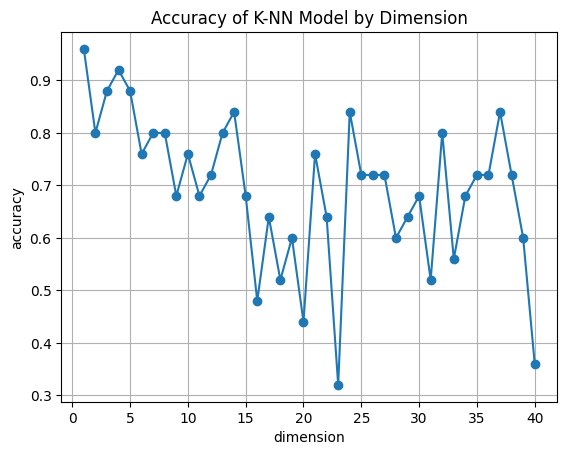

In [91]:
plt.plot(results[:,0], results[:,1], marker='o')

plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.title('Accuracy of K-NN Model by Dimension')
plt.grid(True)
plt.show()

In [92]:
# 차원이 증가할수록 정확도는 떨어지는 추세를 보임

### 20.위치모수 추정

(1) 자유도가 3인 t분포에서 20개의 표본을 추출하시오.

In [93]:
import numpy as np
from scipy.stats import t

t_dat = t.rvs(df=3, size=20)

t_dat

array([-0.487,  0.655, -0.565, -1.112, -1.274, -0.406,  0.389,  2.966,
        0.228,  1.746, -0.401, -0.009, -0.442, -0.966, -3.211, -0.071,
        0.14 ,  2.666, -1.202,  0.186])

(2) (1)에서 추출된 표본을 이용하여 위치 모수를 추정하려고 한다.  
평균, 중앙값, 핫지스레만 일표본추정량(왈쉬평균들의 중앙값)을 이용하여 위치모수를 추정하시오.

[참고]   
왈쉬평균들의 중앙값
* 데이터를 일정한 크기의 작은 그룹으로 나누어 각 그룹에의 평균을 계산하고, 그 평균들의 중앙값을 구하는 방법
* 데이터의 변동이나 극단값에 덜 민감하게 평균을 추정하기 위한 방법으로 사용됨.

예를 들어, 데이터가 이상치나 극단값을 포함하고 있는 경우에는 일반적인 평균이나 중앙값을 사용하는 것보다 왈쉬평균들의 중앙값을 사용하면 더 정확한 추정을 얻을 수 있을 수 있음.

[참고]   
$\binom{k}{n} = \frac{k!}{(n-k)!} \cdot \frac{n!}{k!} = \frac{n!}{(n-k)! \cdot k!}$  
20개의 원소 중에서 2개의 원소를 갖는 조합의 경우의 수  
$\binom{20}{2} = \frac{2!}{(20-2)!} \cdot \frac{20!}{2!} = \frac{20 \times 19}{2} = 190$


In [94]:
import itertools

mean_estimate = np.mean(t_dat)
median_estimate = np.median(t_dat)

comb_arr1 = itertools.combinations(t_dat, 2)
# itertools.combinations(iterable, r) : iterable에서 r개의 원소로 이루어진 모든 조합(순서는 고려하지 않음)을 생성하는 generator임.
# 제너레이터는 값을 필요할 때마다 생성하는 느긋한 방식의 iterable이기 때문에, itertools.combinations 객체는 바로 배열로 변환할 수 없음
# list로 변환하면 제너레이터가 모든 값을 한 번에 생성하여 리스트로 저장하게 됨. 이후에는 리스트 안의 요소들을 numpy의 array 함수를 사용하여 배열로 변환

comb_arr1 = np.array(list(comb_arr1))
# len(list(comb_arr1))
# 190

walsh_avg = comb_arr1.mean(1) # mean 메서드에 인자 1을 넘겨주면 각 행의 평균을 계산
hodges_estimate = np.median(walsh_avg)

print('평균: ', mean_estimate, ', 중앙값: ', median_estimate, ', 핫지스레만 일표본추정량: ', hodges_estimate)


평균:  -0.058568019111345904 , 중앙값:  -0.23625583628537328 , 핫지스레만 일표본추정량:  -0.16193795113277468


(3) (1) ∼ (2) 과정을 100번씩 반복하시오.

In [95]:
results = []

for i in range(100):
  t_dat = t.rvs(df=3, size=20)

  mean_estimate = np.mean(t_dat)
  median_estimate = np.median(t_dat)

  comb_arr1 = np.array(list(itertools.combinations(t_dat, 2)))
  walsh_avg = comb_arr1.mean(1) # mean 메서드에 인자 1을 넘겨주면 각 행의 평균을 계산
  hodges_estimate = np.median(walsh_avg)

  results.append([mean_estimate, median_estimate, hodges_estimate])

results = np.array(results)
print(results)

[[-0.305 -0.281 -0.335]
 [ 0.142  0.028  0.084]
 [ 0.302  0.279  0.253]
 [ 0.262  0.337  0.275]
 [-0.232 -0.122 -0.153]
 [ 0.115  0.071  0.041]
 [ 0.458 -0.17  -0.065]
 [-0.625 -0.042 -0.037]
 [-0.284 -0.102 -0.263]
 [-0.447  0.199  0.368]
 [-0.6    0.05  -0.415]
 [-0.315 -0.245 -0.118]
 [-0.364 -0.351 -0.362]
 [ 0.081 -0.097  0.02 ]
 [ 0.04  -0.024  0.12 ]
 [-0.15  -0.014 -0.072]
 [-1.091 -0.519 -0.758]
 [ 0.729  0.241  0.315]
 [ 0.394 -0.278  0.392]
 [ 0.057  0.182  0.143]
 [ 0.084  0.37   0.14 ]
 [ 0.032  0.183  0.248]
 [-0.088 -0.362 -0.232]
 [ 0.338  0.079  0.185]
 [ 0.112  0.193  0.143]
 [-0.017  0.018 -0.005]
 [ 0.298  0.266  0.3  ]
 [ 0.015  0.009  0.113]
 [ 0.217  0.177  0.071]
 [-0.171 -0.248 -0.182]
 [-0.428 -0.441 -0.453]
 [ 0.022  0.089 -0.183]
 [-0.297 -0.092 -0.185]
 [ 0.624  0.431  0.333]
 [ 0.279  0.329  0.19 ]
 [ 0.093 -0.013  0.019]
 [-0.163 -0.478 -0.364]
 [-0.472 -0.215 -0.345]
 [ 0.603  0.254  0.479]
 [-0.063  0.029  0.027]
 [-0.06   0.238  0.074]
 [-0.346 -0.134 

(4) (3)의 결과를 이용하여, 각 추정량에 대한 분산을 구하고 이를 비교하시오.

In [96]:
var_mean = np.var(results[:, 0])
var_median = np.var(results[:, 1])
var_hodges = np.var(results[:, 2])

print("평균 추정량의 분산:", var_mean)
print("Median 추정량의 분산:", var_median)
print("핫지스-레만 일표본 추정량의 분산", var_hodges)

평균 추정량의 분산: 0.12072141580425853
Median 추정량의 분산: 0.06785557402284847
핫지스-레만 일표본 추정량의 분산 0.07703938621906191


평균 추정량의 분산 > Median 추정량의 분산 > 핫지스-레만 일표본 추정량의 분산으로  
데이터가 이상치나 극단값을 포함하고 있는 경우에는 일반적인 평균이나 중앙값을 사용하는 것보다   
왈쉬평균들의 중앙값이 극단값에 덜 민감하게 평균값이 추정됨.

### 21.위치모수 검정
다음과 같이 주어진 데이터가 있다고 하자.  
[0.302, 1.383, −0.281, −0.876, −0.759, −0.248, 0.009, 1.019, −0.935, 0.275,  
0.413, 0.438, −0.135, −0.091, 0.666, 0.877, −1.135, −1.02, −0.035, 0.353,  
− 1.05, 0.203, 0.43, 0.992, −0.058, −2.26, −0.532, 0.907, 1.3, 1.018]  
위치모수 µ에 대한 가설은 다음과 같다.  
  
$H_0 : \mu = 0 \quad \text{vs.} \quad H_1 : \mu \neq 0
$
   
(1) t-검정과 wilcoxon 검정을 하시오.

In [97]:
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon

data = [0.302, 1.383, -0.281, -0.876, -0.759, -0.248, 0.009, 1.019, -0.935, 0.275,
        0.413, 0.438, -0.135, -0.091, 0.666, 0.877, -1.135, -1.02, -0.035, 0.353,
        -1.05, 0.203, 0.43, 0.992, -0.058, -2.26, -0.532, 0.907, 1.3, 1.018]

alpha = 0.05

# t-검정
t_statistic, t_pvalue = ttest_1samp(data, popmean=0)

if t_pvalue < alpha:
    print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")

# Wilcoxon 부호 순위 검정
wilcoxon_statistic, wilcoxon_pvalue = wilcoxon(data)

if wilcoxon_pvalue < alpha:
    print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")




t-검정의 p-value가 0.8024로 유의수준 0.05보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.
Wilcoxon 부호 순위 검정의 p-value가 0.6408로 유의수준 0.05보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.


(2) 기존 데이터에 이상치 [20, 20, 20, 20]을 추가한 후, t-검정과 wilcoxon 검정을 하시오.

In [98]:
outlier = [20, 20, 20, 20]
new_data = np.concatenate([data, outlier])

alpha = 0.05

# t-검정
t_statistic, t_pvalue = ttest_1samp(new_data, popmean=0)

if t_pvalue < alpha:
    print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")

# Wilcoxon 부호 순위 검정
wilcoxon_statistic, wilcoxon_pvalue = wilcoxon(new_data)

if wilcoxon_pvalue < alpha:
    print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")



t-검정의 p-value가 0.0419로 유의수준 0.05보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.
Wilcoxon 부호 순위 검정의 p-value가 0.1338로 유의수준 0.05보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.


데이터가 정규분포이며 등분산성을 가정할수 없다면 wilcoxon 검정이 더 적합

[참고]

H0: μ = 0 : 두 집단의 평균이 같다.  
H1: μ ≠ 0 : 두 집단의 평균이 같지 않다

평균이 동일한 경우를 나타내는 값으로 0을 선택하는 이유는 통계적 분석의 편의성과 통일성을 위해서임  
  
Wilcoxon 검정은 두 집단의 관측값을 비교하여 그들이 서로 다른 분포에서 온 것인지를 확인하는 통계적 방법.   
이 검정은 두 집단이 정규분포를 따르지 않을 때에도 사용할 수 있으며, 특히 작은 샘플 크기에서 유용함.   
  
1. 두 집단의 관측값을 수집  
2. 두 집단의 관측값을 작은 값이 작은 순위를 가지도록 변환
3. 순위 합계를 계산하여 각 집단의 순위 합계를 비교
4. 순위 합계의 차이가 예상되는 랜덤 분포에서 통계적으로 유의한지 여부를 판단

[참고]  
t-검정과 Wilcoxon 검정은 두 개 이상의 집단의 평균 차이를 비교하는 통계적 방법  
* t검정은 데이터가 정규 분포를 따르며 등분산이라고 가정하고  
두 집단의 평균이 동일한지를 검정
* Wilcoxon 검정은 정규 분포를 따르지 않거나 데이터가 순위 형태일 때 사용하는 비모수 검정이며,  
등분산성을 가정하지 않으며 두 집단의 중앙값 차이에 대한 가설을 검정함.
